## Feedforward Neural Network from Scratch

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [20]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(64, activation='relu'), # Input layer
    Dense(32, activation='relu'),  # Hidden laye
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

In [28]:
model.compile(
    optimizer='adam', # Optimizer
    loss='binary_crossentropy', 
    metrics=['accuracy'] # Metrics to monitor during training
)

In [30]:
history = model.fit(X_train, y_train, # Training data and labels
                    epochs=20, # Number of epochs
                    batch_size=32, # Batch size
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5743 - loss: 0.6637 - val_accuracy: 0.7750 - val_loss: 0.5793
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7999 - loss: 0.5282 - val_accuracy: 0.8438 - val_loss: 0.4869
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8707 - loss: 0.4263 - val_accuracy: 0.8813 - val_loss: 0.4143
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8783 - loss: 0.3679 - val_accuracy: 0.8687 - val_loss: 0.3638
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8966 - loss: 0.3126 - val_accuracy: 0.8938 - val_loss: 0.3204
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9053 - loss: 0.2615 - val_accuracy: 0.9000 - val_loss: 0.2878
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9125 - loss: 0.2345 - val_accuracy: 0.9000 - val_loss: 0.2652
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9315 - loss: 0.2106 - val_accuracy: 0.9062 - val_

In [32]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}")

Test Loss: 0.1685
Test Accuracy: 93.50


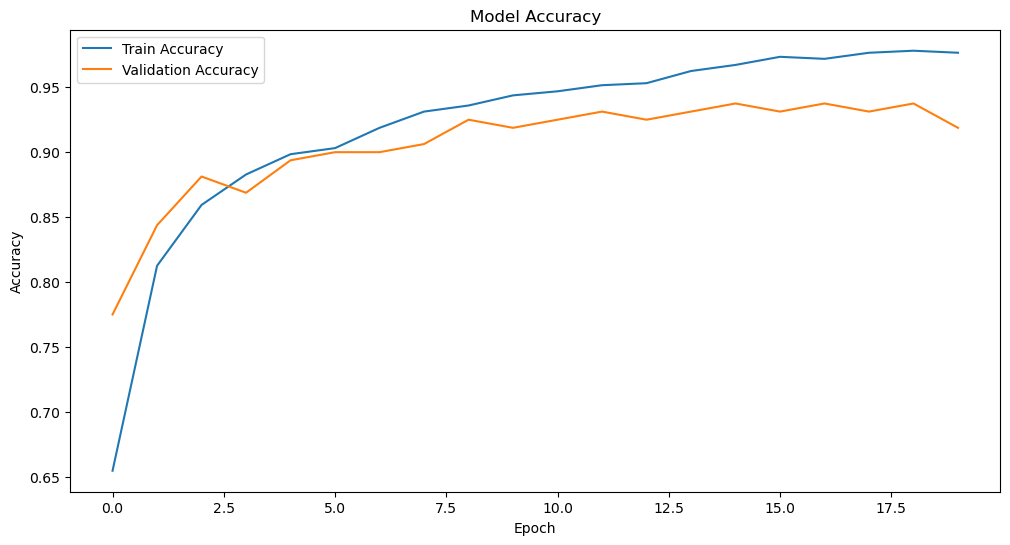

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()